# COVID19 DRUG DISCOVERY

The data for this project was taken from kaggle: https://www.kaggle.com/divyansh22/drug-discovery-data

The goal of this project is to determine if any of these compounds are active against COVID19 based upon experimental data and engineered features using pubchempy. Additionally, we will use machine learning methods to predict the pIC50 values of blinded compounds based upon the aforementioned features.

## COVID19 Drug Discovery efforts and understanding

COVID19 has had substantial impacts on the world, affecting the livelihoods of families, economies of all nations, with almost 6 million deaths worldwide since it's appearance in 2020. While vaccines have been effective in reducing disease severity upon infection, the safety of these vaccines and the policies surrounding their administration continue to be a source of fierce debate. As with any pandemic, efforts towards finding small molecule therapeutics remained at the forefront of combating this disease. This dataset

In [3]:
#!pip install pubchempy

  Using cached PubChemPy-1.0.4.tar.gz (29 kB)
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=14515c0e0717893eabf57c81904a63a09c6264612554ba6d24ceb9ffc931bd11
  Stored in directory: c:\users\adonis mcqueen\appdata\local\pip\cache\wheels\7c\3d\8c\8192697412e9899dc55bbbb08bbc1197bef333caaa2a71c448
Successfully built pubchempy


In [1]:
#import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import rdkit
from rdkit import Chem
import pubchempy as pcp

In [2]:
df = pd.read_csv('DDH Data with Properties.csv', sep=",", header=0)
df.head()

,CID,SMILES,MolecularFormula,MolecularWeight,InChI,InChIKey,IUPACName,XLogP,ExactMass,MonoisotopicMass,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,2744814,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,C21H14Cl2N4OS2,473.4,InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...,LILOEJREEQFTPM-UHFFFAOYSA-N,"N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thia...",5.6,471.998609,471.998609,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
1,2821293,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,C21H15ClF3N5OS2,510.0,"InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...",AWQBIBTZJKFLEW-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[5-[1-methyl-5-(triflu...,4.9,509.035865,509.035865,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2,2820912,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,WRXXISITJDZVCL-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
3,2820914,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,NNVVKOVHRSDRSQ-UHFFFAOYSA-N,N-(2-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.2,8.0,10.0,BLINDED
4,2744846,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,C19H14ClN5OS3,460.0,InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...,JEZYTEDGOJCVQS-UHFFFAOYSA-N,"N-(4-chlorophenyl)-2-[4-[2-(2-methyl-1,3-thiaz...",4.4,459.004901,459.004901,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CID                       104 non-null    int64  
 1   SMILES                    104 non-null    object 
 2   MolecularFormula          104 non-null    object 
 3   MolecularWeight           104 non-null    float64
 4   InChI                     104 non-null    object 
 5   InChIKey                  101 non-null    object 
 6   IUPACName                 101 non-null    object 
 7   XLogP                     101 non-null    float64
 8   ExactMass                 101 non-null    float64
 9   MonoisotopicMass          101 non-null    float64
 10  TPSA                      101 non-null    float64
 11  Complexity                101 non-null    float64
 12  Charge                    101 non-null    float64
 13  HBondDonorCount           101 non-null    float64
 14  HBondAccep

In [4]:
df.shape

(104, 40)

In [5]:
df.isna().sum()

CID                         0
SMILES                      0
MolecularFormula            0
MolecularWeight             0
InChI                       0
InChIKey                    3
IUPACName                   3
XLogP                       3
ExactMass                   3
MonoisotopicMass            3
TPSA                        3
Complexity                  3
Charge                      3
HBondDonorCount             3
HBondAcceptorCount          3
RotatableBondCount          3
HeavyAtomCount              3
IsotopeAtomCount            3
AtomStereoCount             3
DefinedAtomStereoCount      3
UndefinedAtomStereoCount    3
BondStereoCount             3
DefinedBondStereoCount      3
UndefinedBondStereoCount    3
CovalentUnitCount           3
Volume3D                    3
XStericQuadrupole3D         4
YStericQuadrupole3D         4
ZStericQuadrupole3D         4
FeatureCount3D              4
FeatureAcceptorCount3D      4
FeatureDonorCount3D         4
FeatureAnionCount3D         4
FeatureCat

### Insight:
SMILES, molecular formula, InChI, key, and IUPAC name are not important indicators for compound efficacy. will drop from df.

In [6]:
df2 = df.drop(['SMILES', 'MolecularFormula', 'InChI', 'InChIKey', 'IUPACName'], axis=1)
df2.head()

,CID,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,2744814,473.4,5.6,471.998609,471.998609,121.0,559.0,0.0,1.0,6.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
1,2821293,510.0,4.9,509.035865,509.035865,126.0,670.0,0.0,1.0,9.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2,2820912,519.1,6.3,518.013024,518.013024,175.0,627.0,0.0,1.0,8.0,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
3,2820914,519.1,6.3,518.013024,518.013024,175.0,635.0,0.0,1.0,8.0,...,3.0,1.0,0.0,1.0,4.0,1.0,1.2,8.0,10.0,BLINDED
4,2744846,460.0,4.4,459.004901,459.004901,162.0,554.0,0.0,1.0,8.0,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036


In [7]:
df2.columns

Index(['CID', 'MolecularWeight', 'XLogP', 'ExactMass', 'MonoisotopicMass',
       'TPSA', 'Complexity', 'Charge', 'HBondDonorCount', 'HBondAcceptorCount',
       'RotatableBondCount', 'HeavyAtomCount', 'IsotopeAtomCount',
       'AtomStereoCount', 'DefinedAtomStereoCount', 'UndefinedAtomStereoCount',
       'BondStereoCount', 'DefinedBondStereoCount', 'UndefinedBondStereoCount',
       'CovalentUnitCount', 'Volume3D', 'XStericQuadrupole3D',
       'YStericQuadrupole3D', 'ZStericQuadrupole3D', 'FeatureCount3D',
       'FeatureAcceptorCount3D', 'FeatureDonorCount3D', 'FeatureAnionCount3D',
       'FeatureCationCount3D', 'FeatureRingCount3D',
       'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
       'EffectiveRotorCount3D', 'ConformerCount3D', 'pIC50'],
      dtype='object')

In [8]:
#create df with blinded values

blinded_df = df2[df2['pIC50'] == 'BLINDED']

blinded_df        

,CID,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
3,2820914,519.10,6.3,518.013024,518.013024,175.0,635.0,0.0,1.0,8.0,...,3.0,1.0,0.0,1.0,4.0,1.0,1.2,8.0,10.0,BLINDED
22,135427623,437.40,2.5,437.079390,437.079390,175.0,835.0,0.0,2.0,8.0,...,6.0,2.0,1.0,0.0,3.0,0.0,1.0,8.0,10.0,BLINDED
27,164676,294.30,4.3,294.125594,294.125594,47.3,509.0,0.0,0.0,3.0,...,3.0,0.0,0.0,0.0,4.0,1.0,0.6,0.8,1.0,BLINDED
41,2799801,494.50,4.4,494.126006,494.126006,167.0,935.0,0.0,2.0,10.0,...,6.0,2.0,0.0,2.0,2.0,0.0,1.2,12.0,10.0,BLINDED
45,2799800,588.60,5.4,588.177766,588.177766,172.0,946.0,0.0,2.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLINDED
57,16204323,379.10,4.4,377.981027,377.981027,98.2,503.0,0.0,0.0,6.0,...,5.0,0.0,1.0,0.0,3.0,0.0,1.0,5.0,10.0,BLINDED
62,16202740,268.09,3.5,266.985384,266.985384,39.2,267.0,0.0,0.0,3.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.6,3.0,10.0,BLINDED
67,58589722,309.34,-0.4,309.078327,309.078327,95.2,548.0,0.0,1.0,6.0,...,4.0,1.0,0.0,1.0,3.0,0.0,0.6,3.4,10.0,BLINDED
73,4117383,294.33,0.6,294.067428,294.067428,91.9,519.0,0.0,1.0,5.0,...,4.0,1.0,0.0,0.0,3.0,0.0,0.6,3.4,10.0,BLINDED
94,44398167,421.18,3.0,420.981100,420.981100,55.8,499.0,0.0,0.0,4.0,...,4.0,0.0,0.0,0.0,4.0,1.0,0.6,3.0,10.0,BLINDED


In [9]:
blinded_df.shape

(10, 35)

In [10]:
#removing blinded pIC50 values from main dataframe

df2 = df2.loc[df2['pIC50'] != 'BLINDED']
df2.shape

(94, 35)

In [11]:
#removing rows where CID=0

df2 = df2.loc[df2['CID'] != 0]
df2.head()

,CID,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,2744814,473.4,5.6,471.998609,471.998609,121.0,559.0,0.0,1.0,6.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
1,2821293,510.0,4.9,509.035865,509.035865,126.0,670.0,0.0,1.0,9.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2,2820912,519.1,6.3,518.013024,518.013024,175.0,627.0,0.0,1.0,8.0,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
4,2744846,460.0,4.4,459.004901,459.004901,162.0,554.0,0.0,1.0,8.0,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036
5,2745617,422.9,4.4,422.060425,422.060425,106.0,529.0,0.0,1.0,6.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.176091259


In [12]:
df2.shape

(91, 35)

In [13]:
df2.isnull().values.any()

False

In [14]:
#setting CID as index so values do not interfere with analysis

df2.set_index(df2['CID'], inplace=True)
df2.head()

,CID,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
CID,,,,,,,,,,,,,,,,,,,,,
2744814,2744814,473.4,5.6,471.998609,471.998609,121.0,559.0,0.0,1.0,6.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
2821293,2821293,510.0,4.9,509.035865,509.035865,126.0,670.0,0.0,1.0,9.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2820912,2820912,519.1,6.3,518.013024,518.013024,175.0,627.0,0.0,1.0,8.0,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
2744846,2744846,460.0,4.4,459.004901,459.004901,162.0,554.0,0.0,1.0,8.0,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036
2745617,2745617,422.9,4.4,422.060425,422.060425,106.0,529.0,0.0,1.0,6.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.176091259


In [15]:
df2.drop('CID', axis=1, inplace=True)
df2.head()

,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
CID,,,,,,,,,,,,,,,,,,,,,
2744814,473.4,5.6,471.998609,471.998609,121.0,559.0,0.0,1.0,6.0,6.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
2821293,510.0,4.9,509.035865,509.035865,126.0,670.0,0.0,1.0,9.0,6.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2820912,519.1,6.3,518.013024,518.013024,175.0,627.0,0.0,1.0,8.0,7.0,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
2744846,460.0,4.4,459.004901,459.004901,162.0,554.0,0.0,1.0,8.0,6.0,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036
2745617,422.9,4.4,422.060425,422.060425,106.0,529.0,0.0,1.0,6.0,6.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.176091259


In [16]:
df2.columns

Index(['MolecularWeight', 'XLogP', 'ExactMass', 'MonoisotopicMass', 'TPSA',
       'Complexity', 'Charge', 'HBondDonorCount', 'HBondAcceptorCount',
       'RotatableBondCount', 'HeavyAtomCount', 'IsotopeAtomCount',
       'AtomStereoCount', 'DefinedAtomStereoCount', 'UndefinedAtomStereoCount',
       'BondStereoCount', 'DefinedBondStereoCount', 'UndefinedBondStereoCount',
       'CovalentUnitCount', 'Volume3D', 'XStericQuadrupole3D',
       'YStericQuadrupole3D', 'ZStericQuadrupole3D', 'FeatureCount3D',
       'FeatureAcceptorCount3D', 'FeatureDonorCount3D', 'FeatureAnionCount3D',
       'FeatureCationCount3D', 'FeatureRingCount3D',
       'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
       'EffectiveRotorCount3D', 'ConformerCount3D', 'pIC50'],
      dtype='object')

In [17]:
for x in df2.columns:
    print(df2.value_counts(x))

MolecularWeight
344.70    3
322.40    2
234.64    2
278.65    2
399.50    2
         ..
338.30    1
334.40    1
334.10    1
331.30    1
565.00    1
Length: 83, dtype: int64
XLogP
 4.1    7
 3.3    5
 3.8    5
 2.7    4
 4.9    4
 4.7    4
 3.7    4
 2.8    3
 1.1    3
 1.2    3
 1.4    3
 4.6    3
 1.8    3
 3.6    2
 3.4    2
-0.6    2
 3.9    2
 5.9    2
 4.4    2
 3.2    2
 1.6    2
 2.3    2
 1.5    2
 3.1    1
 6.3    1
 0.2    1
 5.6    1
 5.5    1
 5.0    1
 0.7    1
 1.0    1
 4.5    1
 4.2    1
-0.5    1
 1.7    1
 4.0    1
 2.2    1
 2.4    1
 2.5    1
 3.5    1
 2.6    1
 2.9    1
 7.3    1
dtype: int64
ExactMass
344.019999    3
322.098728    2
278.009434    2
234.019605    2
399.125277    2
             ..
338.036128    1
334.055818    1
332.995948    1
331.062677    1
563.814325    1
Length: 83, dtype: int64
MonoisotopicMass
344.019999    3
322.098728    2
278.009434    2
234.019605    2
399.125277    2
             ..
338.036128    1
334.055818    1
332.995948    1
331.06

### Insight
Some of these features don't have any effect on drug action (Mass, molecular weight) and others only have one value for every molecule listed (Charge, isotopeatomcount, etc). These features will be dropped from the dataset, as they don't have a substantial effect on anti-COVID19 efficacy.

In [18]:
#drop columns with only one value and columns that don't contribute to drug action.

todrop = ['MolecularWeight', 'ExactMass', 'MonoisotopicMass', 'Charge', 'IsotopeAtomCount', 'DefinedAtomStereoCount', 'UndefinedBondStereoCount',
         'CovalentUnitCount']

df2.drop(todrop, axis=1, inplace=True)
df2.shape

(91, 26)

## EDA of Features

Now that we have a clean dataset, we will explore the data and look for collinearity and other trends.

In [19]:
df2.columns

Index(['XLogP', 'TPSA', 'Complexity', 'HBondDonorCount', 'HBondAcceptorCount',
       'RotatableBondCount', 'HeavyAtomCount', 'AtomStereoCount',
       'UndefinedAtomStereoCount', 'BondStereoCount', 'DefinedBondStereoCount',
       'Volume3D', 'XStericQuadrupole3D', 'YStericQuadrupole3D',
       'ZStericQuadrupole3D', 'FeatureCount3D', 'FeatureAcceptorCount3D',
       'FeatureDonorCount3D', 'FeatureAnionCount3D', 'FeatureCationCount3D',
       'FeatureRingCount3D', 'FeatureHydrophobeCount3D',
       'ConformerModelRMSD3D', 'EffectiveRotorCount3D', 'ConformerCount3D',
       'pIC50'],
      dtype='object')

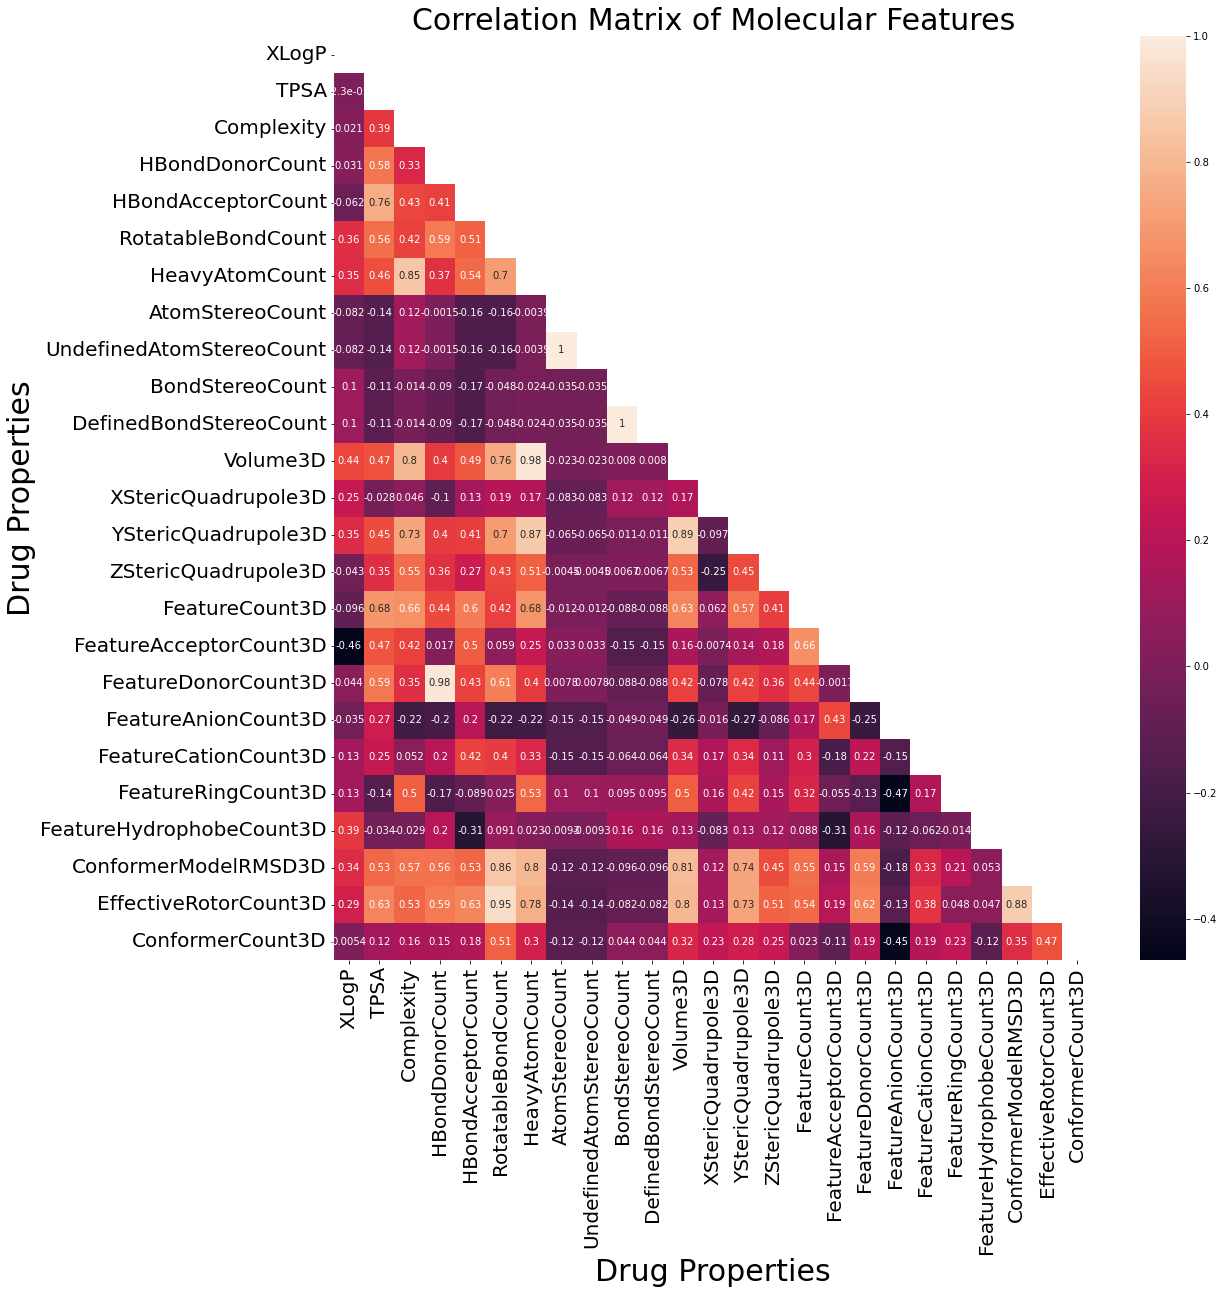

In [20]:
#plot correlation matrix to detect multicollinearity of features

corrmatrix = df2.corr()
matrix = np.triu(corrmatrix)

# plot correlation matrix in heat map with seaborn
fig, ax = plt.subplots(figsize=(17,17)) 
sns.heatmap(corrmatrix, annot=True, mask=matrix)

# label plot
plt.title('Correlation Matrix of Molecular Features', size=30)
plt.xlabel('Drug Properties', size=30)
plt.ylabel('Drug Properties', size=30)
plt.xticks(size=20)
plt.yticks(size=20);

### Insight
Many of these features are highly correlated (r > 0.7), which can cause problems for potential regression analysis

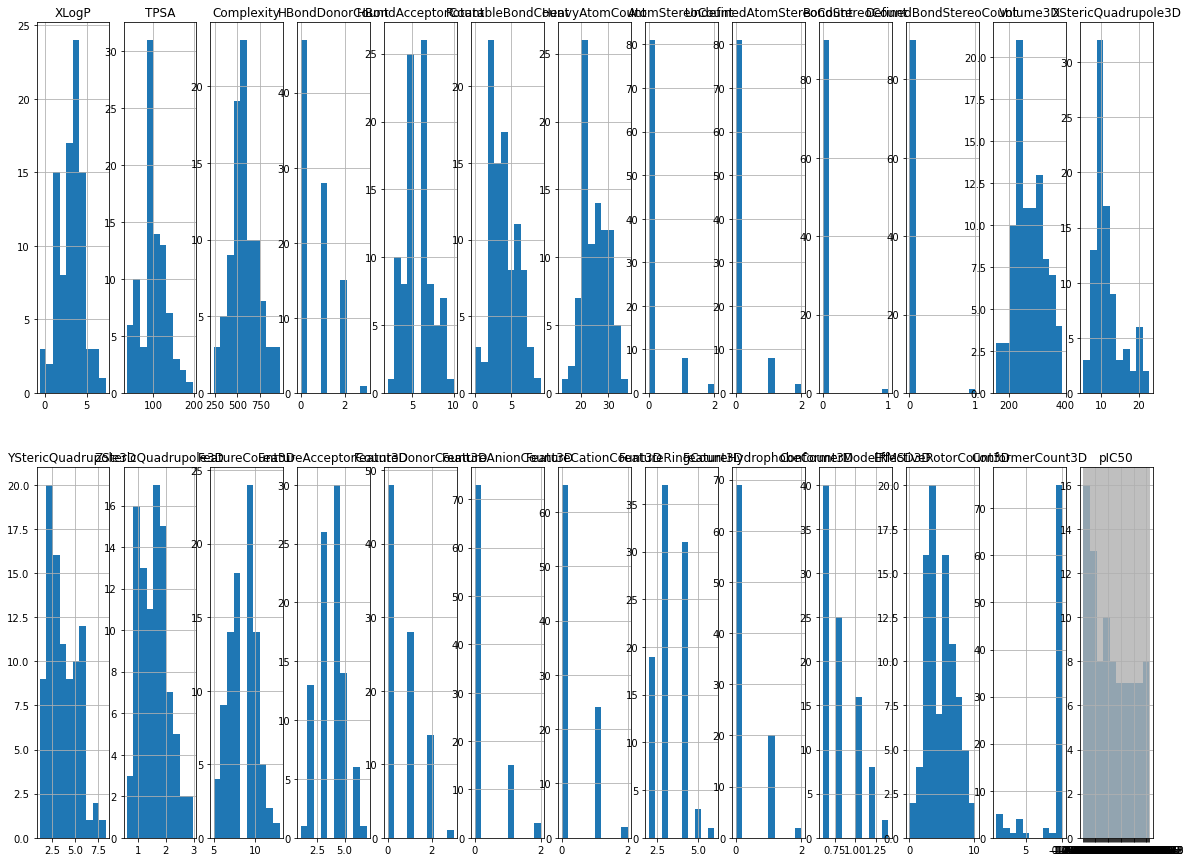

In [28]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 15))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name)
    #fig.tight_layout()  
    plt.show()


draw_histograms(df2, df2.columns, 2, 13)

In [24]:
cmpd_A = pcp.Compound.from_cid(2744814)
print(cmpd_A.molecular_formula)
print(cmpd_A.iupac_name)

C21H14Cl2N4OS2
N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thiazol-4-yl)pyrimidin-2-yl]sulfanylacetamide


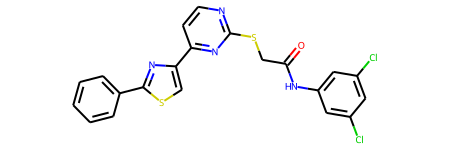

In [23]:


Chem.MolFromSmiles(df.SMILES[0])